# Metrics and Plots for the trained models

In [1]:
MAIN_DUMP='../dump/'
import os,sys
from joblib import Parallel, delayed,dump,load

sys.path.append(os.path.abspath('../src/ml'))
from load_matrix import load_df
from model_trainer import MLModel
from utils import load_models

import pandas as pd

from evaluator import Evaluator
from collector import ResultsCollector
from visualizer import DashboardVisualizer


## v2.10 standardized

In [13]:
standardized_protein_embeddings=load_models('../dump_standardized',version='v2.10')

In [19]:
keep_model_names=list(standardized_protein_embeddings.keys())

In [21]:
collector = ResultsCollector()
metrics_list = []
metrics_list=[]
for model_name, ml_model in standardized_protein_embeddings.items():
    print(f'-- Evaluating model: {model_name} v2.10 --')
    y_test, y_pred, y_proba = ml_model.y_test, ml_model.y_pred, ml_model.y_proba
    metrics = Evaluator(y_test, y_pred, y_proba).compute_metrics()
    metrics_list.append({
            "model": ml_model.model_type,
            "input": ml_model.dataset_name,
            **metrics
    })

    collector.add(ml_model.model_type, ml_model.dataset_name, y_test, y_pred, y_proba)

-- Evaluating model: random_forest_Complex_protein_embeddings_gridsearch_model.joblib v2.10 --
-- Evaluating model: random_forest_concatenated_protein_embeddings_gridsearch_model.joblib v2.10 --
-- Evaluating model: random_forest_RGCN_protein_embeddings_gridsearch_model.joblib v2.10 --
-- Evaluating model: sklearn_mlp_Complex_protein_embeddings_gridsearch_model.joblib v2.10 --
-- Evaluating model: sklearn_mlp_concatenated_protein_embeddings_gridsearch_model.joblib v2.10 --
-- Evaluating model: sklearn_mlp_RGCN_protein_embeddings_gridsearch_model.joblib v2.10 --
-- Evaluating model: svm_Complex_protein_embeddings_gridsearch_model.joblib v2.10 --
-- Evaluating model: svm_concatenated_protein_embeddings_gridsearch_model.joblib v2.10 --
-- Evaluating model: svm_RGCN_protein_embeddings_gridsearch_model.joblib v2.10 --
-- Evaluating model: xgboost_Complex_protein_embeddings_gridsearch_model.joblib v2.10 --
-- Evaluating model: xgboost_concatenated_protein_embeddings_gridsearch_model.joblib v

In [22]:
results_stand=pd.DataFrame(metrics_list)

compare with non standardized embeddings

In [23]:
ALL_MODELS_v2_10=load_models(MAIN_DUMP,'v2.10')

In [24]:
collector = ResultsCollector()
metrics_list = []
metrics_list=[]
for model_name, ml_model in ALL_MODELS_v2_10.items():
    if model_name not in keep_model_names:
        continue
    print(f'-- Evaluating model: {model_name} v2.10 --')
    y_test, y_pred, y_proba = ml_model.y_test, ml_model.y_pred, ml_model.y_proba
    metrics = Evaluator(y_test, y_pred, y_proba).compute_metrics()
    metrics_list.append({
            "model": ml_model.model_type,
            "input": ml_model.dataset_name,
            **metrics
    })

    collector.add(ml_model.model_type, ml_model.dataset_name, y_test, y_pred, y_proba)

-- Evaluating model: random_forest_Complex_protein_embeddings_gridsearch_model.joblib v2.10 --
-- Evaluating model: random_forest_concatenated_protein_embeddings_gridsearch_model.joblib v2.10 --
-- Evaluating model: random_forest_RGCN_protein_embeddings_gridsearch_model.joblib v2.10 --
-- Evaluating model: sklearn_mlp_Complex_protein_embeddings_gridsearch_model.joblib v2.10 --
-- Evaluating model: sklearn_mlp_concatenated_protein_embeddings_gridsearch_model.joblib v2.10 --
-- Evaluating model: sklearn_mlp_RGCN_protein_embeddings_gridsearch_model.joblib v2.10 --
-- Evaluating model: svm_Complex_protein_embeddings_gridsearch_model.joblib v2.10 --
-- Evaluating model: svm_concatenated_protein_embeddings_gridsearch_model.joblib v2.10 --
-- Evaluating model: svm_RGCN_protein_embeddings_gridsearch_model.joblib v2.10 --


-- Evaluating model: xgboost_Complex_protein_embeddings_gridsearch_model.joblib v2.10 --
-- Evaluating model: xgboost_concatenated_protein_embeddings_gridsearch_model.joblib v2.10 --
-- Evaluating model: xgboost_RGCN_protein_embeddings_gridsearch_model.joblib v2.10 --


In [25]:
results_nonstand=pd.DataFrame(metrics_list)

In [27]:
results_stand

,model,input,balanced_accuracy,precision,recall,f1,mcc,auroc,auprc,brier
0,random_forest,Complex_protein_embeddings,0.642857,0.838710,1.000000,0.912281,0.489522,0.719780,0.913945,0.155304
1,random_forest,concatenated_protein_embeddings,0.714286,0.866667,1.000000,0.928571,0.609449,0.862637,0.956734,0.132044
2,random_forest,RGCN_protein_embeddings,0.532967,0.800000,0.923077,0.857143,0.093761,0.774725,0.907648,0.142390
3,sklearn_mlp,Complex_protein_embeddings,0.659341,0.923077,0.461538,0.615385,0.266628,0.791209,0.937096,0.394195
4,sklearn_mlp,concatenated_protein_embeddings,0.480769,0.781250,0.961538,0.862069,-0.091725,0.480769,0.781505,0.207336
5,sklearn_mlp,RGCN_protein_embeddings,0.500000,0.787879,1.000000,0.881356,0.000000,0.538462,0.804196,0.165418
6,svm,Complex_protein_embeddings,0.642857,0.838710,1.000000,0.912281,0.489522,0.857143,0.956075,0.141699
7,svm,concatenated_protein_embeddings,0.500000,0.787879,1.000000,0.881356,0.000000,0.510989,0.846379,0.167153
8,svm,RGCN_protein_embeddings,0.500000,0.787879,1.000000,0.881356,0.000000,0.510989,0.846379,0.167219
9,xgboost,Complex_protein_embeddings,0.500000,0.787879,1.000000,0.881356,0.000000,0.945055,0.985987,0.182216


In [28]:
results_nonstand

,model,input,balanced_accuracy,precision,recall,f1,mcc,auroc,auprc,brier
0,random_forest,Complex_protein_embeddings,0.980769,1.000000,0.961538,0.980392,0.917249,1.000000,1.000000,0.034265
1,random_forest,concatenated_protein_embeddings,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.029705
2,random_forest,RGCN_protein_embeddings,0.604396,0.827586,0.923077,0.872727,0.261528,0.851648,0.961477,0.129460
3,sklearn_mlp,Complex_protein_embeddings,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.010919
4,sklearn_mlp,concatenated_protein_embeddings,0.500000,0.787879,1.000000,0.881356,0.000000,0.500000,0.787879,0.212121
5,sklearn_mlp,RGCN_protein_embeddings,0.500000,0.000000,0.000000,0.000000,0.000000,0.500000,0.787879,0.787879
6,svm,Complex_protein_embeddings,0.909341,0.961538,0.961538,0.961538,0.818681,0.016484,0.599918,0.174254
7,svm,concatenated_protein_embeddings,0.500000,0.787879,1.000000,0.881356,0.000000,0.494505,0.831526,0.167219
8,svm,RGCN_protein_embeddings,0.500000,0.787879,1.000000,0.881356,0.000000,0.494505,0.831526,0.167306
9,xgboost,Complex_protein_embeddings,0.980769,1.000000,0.961538,0.980392,0.917249,1.000000,1.000000,0.041468


## v2.10

In [2]:
ALL_MODELS_v2_10=load_models(MAIN_DUMP,'v2.10')

In [ ]:
collector = ResultsCollector()
metrics_list = []
metrics_list=[]
for model_name, ml_model in ALL_MODELS_v2_10.items():
    print(f'-- Evaluating model: {model_name} v2.10 --')
    y_test, y_pred, y_proba = ml_model.y_test, ml_model.y_pred, ml_model.y_proba
    metrics = Evaluator(y_test, y_pred, y_proba).compute_metrics()
    metrics_list.append({
            "model": ml_model.model_type,
            "input": ml_model.dataset_name,
            **metrics
    })

    collector.add(ml_model.model_type, ml_model.dataset_name, y_test, y_pred, y_proba)

-- Evaluating model: random_forest_Complex_protein_embeddings_gridsearch_model.joblib v2.10 --
-- Evaluating model: random_forest_Complex_sample_embeddings_gridsearch_model.joblib v2.10 --
-- Evaluating model: random_forest_concatenated_protein_embeddings_gridsearch_model.joblib v2.10 --
-- Evaluating model: random_forest_concatenated_sample_embeddings_gridsearch_model.joblib v2.10 --
-- Evaluating model: random_forest_gene_expression_gridsearch_model.joblib v2.10 --
-- Evaluating model: random_forest_RGCN_protein_embeddings_gridsearch_model.joblib v2.10 --
-- Evaluating model: random_forest_RGCN_sample_embeddings_gridsearch_model.joblib v2.10 --
-- Evaluating model: sklearn_mlp_Complex_protein_embeddings_gridsearch_model.joblib v2.10 --
-- Evaluating model: sklearn_mlp_Complex_sample_embeddings_gridsearch_model.joblib v2.10 --
-- Evaluating model: sklearn_mlp_concatenated_protein_embeddings_gridsearch_model.joblib v2.10 --
-- Evaluating model: sklearn_mlp_concatenated_sample_embedding

In [4]:
results_df_v2_10 = pd.DataFrame(metrics_list)
results_df_v2_10

,model,input,balanced_accuracy,precision,recall,f1,mcc,auroc,auprc,brier
0,random_forest,Complex_protein_embeddings,0.980769,1.000000,0.961538,0.980392,0.917249,1.000000,1.000000,0.034265
1,random_forest,Complex_sample_embeddings,0.500000,0.787879,1.000000,0.881356,0.000000,0.379121,0.752217,0.197538
2,random_forest,concatenated_protein_embeddings,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.029705
3,random_forest,concatenated_sample_embeddings,0.500000,0.787879,1.000000,0.881356,0.000000,0.637363,0.904219,0.173510
4,random_forest,gene_expression,0.785714,0.896552,1.000000,0.945455,0.715762,0.994505,0.998575,0.077027
5,random_forest,RGCN_protein_embeddings,0.604396,0.827586,0.923077,0.872727,0.261528,0.851648,0.961477,0.129460
6,random_forest,RGCN_sample_embeddings,0.675824,0.857143,0.923077,0.888889,0.400941,0.675824,0.840949,0.165363
7,sklearn_mlp,Complex_protein_embeddings,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.010919
8,sklearn_mlp,Complex_sample_embeddings,0.480769,0.781250,0.961538,0.862069,-0.091725,0.362637,0.738561,0.206757
9,sklearn_mlp,concatenated_protein_embeddings,0.500000,0.787879,1.000000,0.881356,0.000000,0.500000,0.787879,0.212121


In [7]:
results_df=results_df_v2_10.copy()

In [11]:
xgboost=results_df[results_df['model']=='xgboost']
xgboost

,model,input,balanced_accuracy,precision,recall,f1,mcc,auroc,auprc,brier
21,xgboost,Complex_protein_embeddings,0.980769,1.000000,0.961538,0.980392,0.917249,1.000000,1.000000,0.041468
22,xgboost,Complex_sample_embeddings,0.500000,0.787879,1.000000,0.881356,0.000000,0.439560,0.769726,0.198225
23,xgboost,concatenated_protein_embeddings,0.980769,1.000000,0.961538,0.980392,0.917249,0.994505,0.998575,0.025185
24,xgboost,concatenated_sample_embeddings,0.500000,0.787879,1.000000,0.881356,0.000000,0.472527,0.775592,0.197882
25,xgboost,gene_expression,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.030040
26,xgboost,RGCN_protein_embeddings,0.656593,0.851852,0.884615,0.867925,0.331957,0.763736,0.934179,0.162187
27,xgboost,RGCN_sample_embeddings,0.500000,0.787879,1.000000,0.881356,0.000000,0.730769,0.919150,0.188730


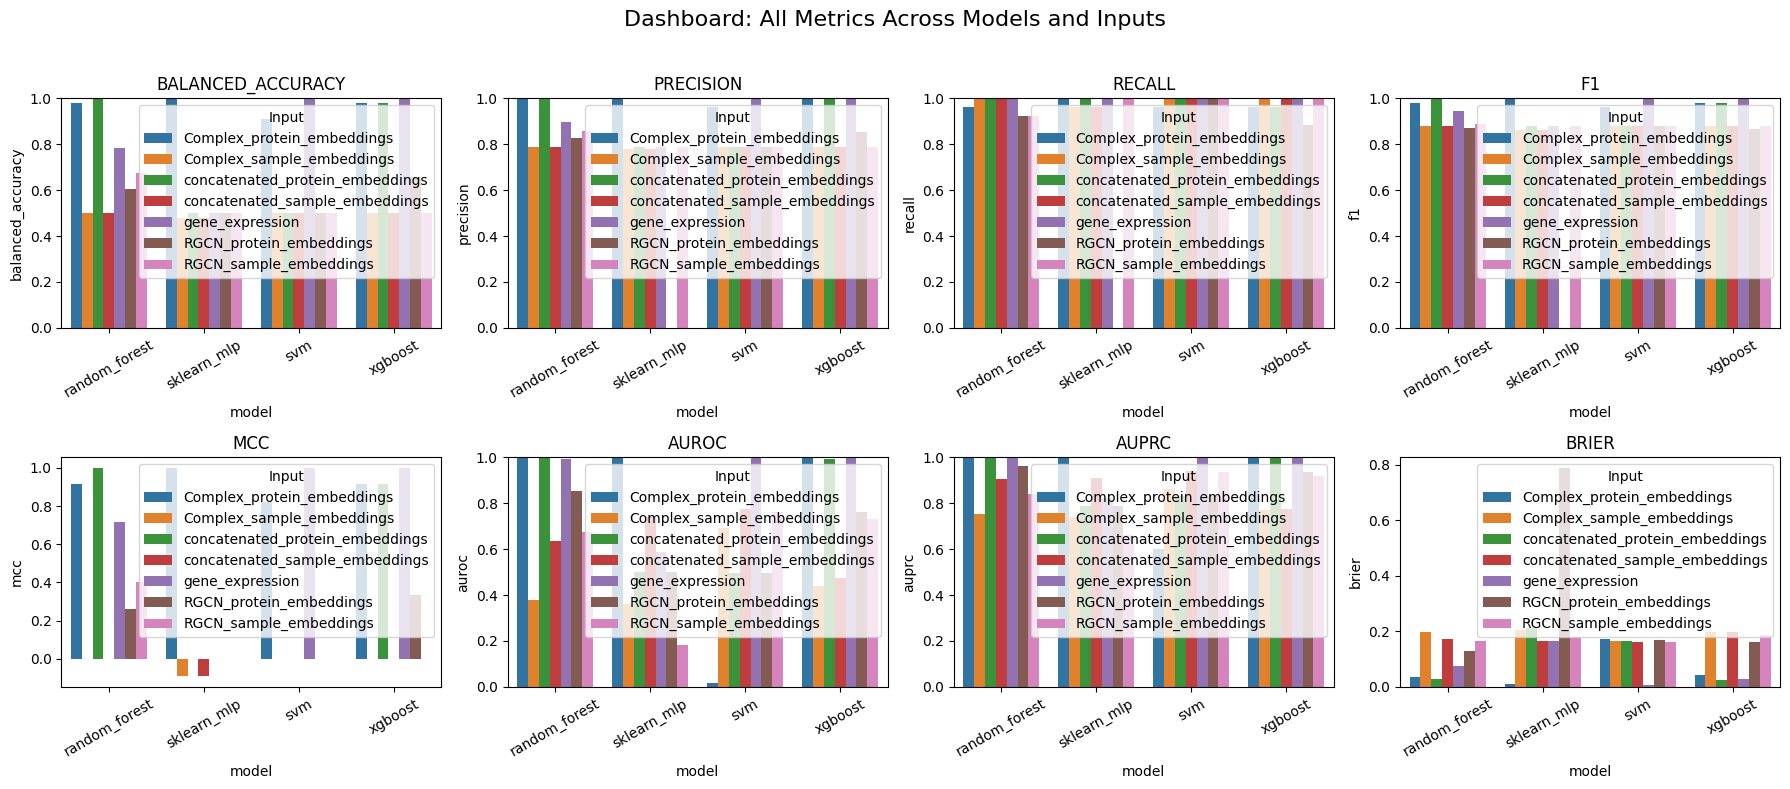

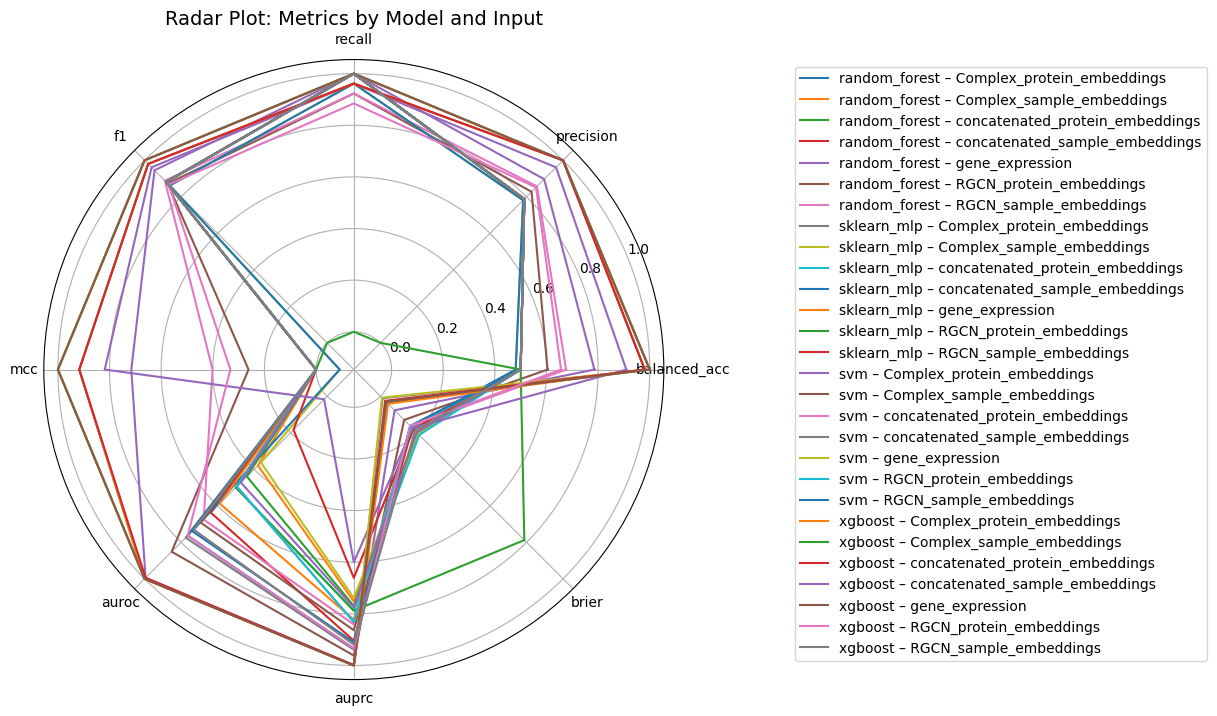

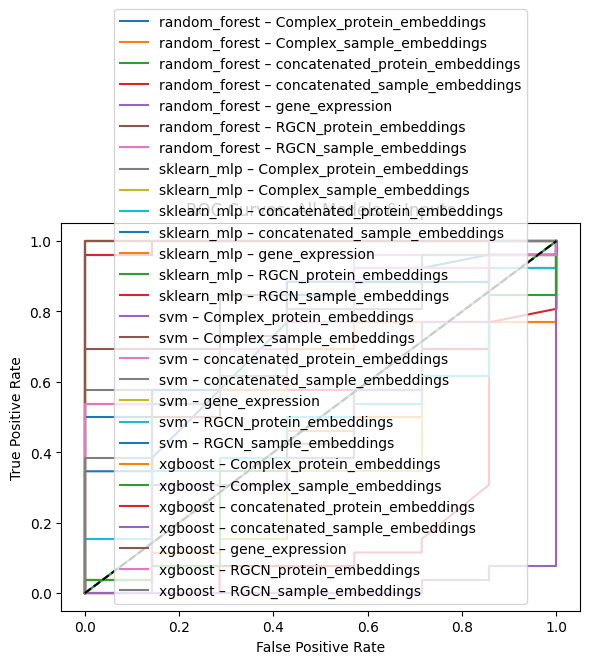

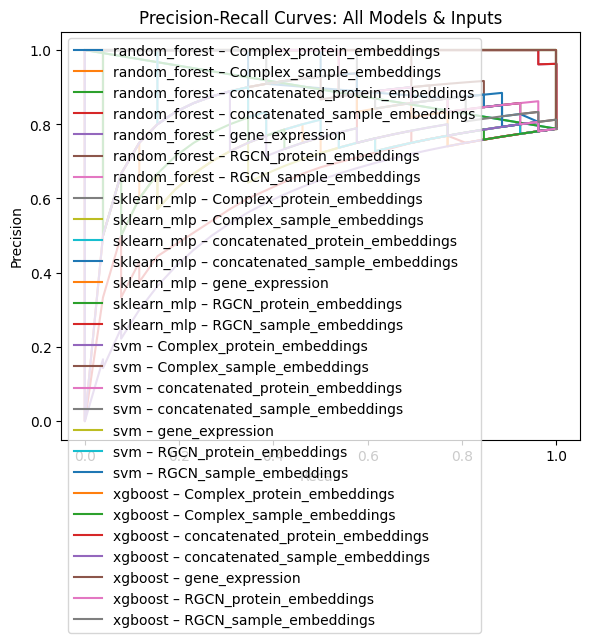

In [5]:
dashboard = DashboardVisualizer(results_df_v2_10, collector)
dashboard.plot_metric_grid()
dashboard.plot_radar()
dashboard.plot_roc_curves()
dashboard.plot_pr_curves()